In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/LOLOracleDataWr.csv')

In [3]:
df.head()

,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup,Winner
0,0.524364,0.506967,0.497972,0.523989,0.438144,0.533592,0.494477,0.491465,0.503883,0.492260,1
1,0.524364,0.504318,0.565594,0.523989,0.491429,0.516260,0.509972,0.559211,0.504505,0.440678,0
2,0.513399,0.486450,0.553073,0.525246,0.524819,0.489831,0.539535,0.465315,0.470158,0.527418,0
3,0.511305,0.505097,0.502868,0.524169,0.534702,0.508671,0.502106,0.508434,0.393443,0.492582,1
4,0.524364,0.509764,0.421169,0.525246,0.516461,0.499863,0.502106,0.445918,0.465315,0.473513,1


In [4]:
df.columns

Index(['BTop', 'BJng', 'BMid', 'BAdc', 'BSup', 'RTop', 'RJng', 'RMid', 'RAdc',
       'RSup', 'Winner'],
      dtype='object')

In [5]:
Red = ['RTop', 'RJng', 'RMid', 'RAdc','RSup']
Blue = ['BTop', 'BJng', 'BMid', 'BAdc', 'BSup']

In [6]:
for i in Red:
    df[i]=-df[i]

In [7]:
df.head()

,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup,Winner
0,0.524364,0.506967,0.497972,0.523989,0.438144,-0.533592,-0.494477,-0.491465,-0.503883,-0.492260,1
1,0.524364,0.504318,0.565594,0.523989,0.491429,-0.516260,-0.509972,-0.559211,-0.504505,-0.440678,0
2,0.513399,0.486450,0.553073,0.525246,0.524819,-0.489831,-0.539535,-0.465315,-0.470158,-0.527418,0
3,0.511305,0.505097,0.502868,0.524169,0.534702,-0.508671,-0.502106,-0.508434,-0.393443,-0.492582,1
4,0.524364,0.509764,0.421169,0.525246,0.516461,-0.499863,-0.502106,-0.445918,-0.465315,-0.473513,1


In [8]:
#For all entries with Blue = 1 and Red = -1

for i in range(len(df)):
    if df.loc[i,'Winner']==0:
        df.loc[i,'Winner']=1
    else:
        df.loc[i,'Winner']=-1
        
df['Winner'] = df['Winner'].astype(int)

In [9]:
df.head()

,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup,Winner
0,0.524364,0.506967,0.497972,0.523989,0.438144,-0.533592,-0.494477,-0.491465,-0.503883,-0.492260,-1
1,0.524364,0.504318,0.565594,0.523989,0.491429,-0.516260,-0.509972,-0.559211,-0.504505,-0.440678,1
2,0.513399,0.486450,0.553073,0.525246,0.524819,-0.489831,-0.539535,-0.465315,-0.470158,-0.527418,1
3,0.511305,0.505097,0.502868,0.524169,0.534702,-0.508671,-0.502106,-0.508434,-0.393443,-0.492582,-1
4,0.524364,0.509764,0.421169,0.525246,0.516461,-0.499863,-0.502106,-0.445918,-0.465315,-0.473513,-1


### Lets implement KNN model now

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Winner',axis=1)
y = df['Winner']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
predictions = knn.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1431 1518]
 [1391 1564]]


              precision    recall  f1-score   support

          -1       0.51      0.49      0.50      2949
           1       0.51      0.53      0.52      2955

    accuracy                           0.51      5904
   macro avg       0.51      0.51      0.51      5904
weighted avg       0.51      0.51      0.51      5904



In [19]:
#Lets choose a K value now

In [20]:
error_rate = []

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

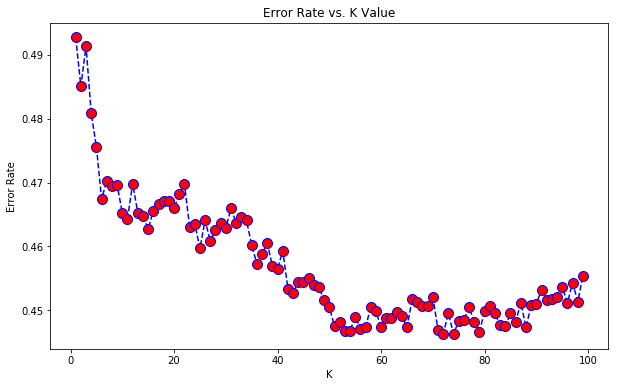

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
knn = KNeighborsClassifier(n_neighbors=64)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=64, p=2,
                     weights='uniform')

In [25]:
predictions = knn.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1616 1333]
 [1319 1636]]


              precision    recall  f1-score   support

          -1       0.55      0.55      0.55      2949
           1       0.55      0.55      0.55      2955

    accuracy                           0.55      5904
   macro avg       0.55      0.55      0.55      5904
weighted avg       0.55      0.55      0.55      5904

